#   Machine Learning : Stroke Prediction Phase 1

###         Name : Nikhil Horakeri                                                                               

===================================================================================================================

#                               Stroke Prediction 

## Table of contents:

* [Section 1    -     Introduction](#Introduction)
    * [Section 1.1   -     Dataset Source](#Dataset_source)
    * [Section 1.2   -     Dataset Details](#Dataset_Details)
    * [Section 1.3   -     Dataset Features](#Dataset_Features)
    * [Section 1.4   -     Target Feature](#Target_Feature)
* [Section 2 -  Goals and Objectives](#Goals_objectives)
* [Section 3 -  Data Cleaning and Preprocessing](#s3)
    * [Section 3.1   -     Check for Irrelveant Features](#s3.1)
    * [Section 3.2   -     Check the datatypes of all the attributes and Target Feature](#s3.2)
    * [Section 3.3   -     Dealing with missing values](#s3.3)
    * [Section 3.4   -     Dealing with incorrect values](#s3.4)
    * [Section 3.5   -     Dealing with outliers](#s3.5)
* [Section 4 -  Data Exploration and Visualisation](#s4)
    * [Section 4.1   -     One variable plots](#s4.1)
        * [Section 4.1.1   -    Visualisation of target variable - stroke](#s4.1.1)
        * [Section 4.1.2   -    Visualisation of variable age ](#s4.1.2)
    * [Section 4.2   -    Two variable plots](#s4.2)
        * [Section 4.2.1   -    Visualisation of BMI and Average glucose level](#s4.2.1)
        * [Section 4.2.2   -    Visualisation of BMI and Stroke](#s4.2.2)
    * [Section 4.3   -    Three variable plot](#s4.3)
        * [Section 4.3.1   -    Visualisation for BMI, stroke and hypertension variables](#s4.3.1)
        * [Section 4.3.2   -    Visualisation for Age, stroke and gender variables](#s4.3.2)
* [Section 5   -    Summary and Conclusions](#s5)
* [Section 6   -    References](#s6)

## 1) Introduction <a class="anchor" id="Introduction"></a>

### 1.1) Dataset source: <a class="anchor" id="Dataset_source"></a>

Stroke Prediction Dataset (2021). Available at: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

### 1.2) Dataset Details: <a class="anchor" id="Dataset_Details"></a>

Stroke is the second leading cause of death globally, responsible for approximately 11% of total deaths 
according to a study by WHO(World Health Organisation). A stroke occurs when the blood supply to the part of 
the Brain is interrupted or reduced. There are many causes of stroke but High Blood pressure is the leading 
cause of stroke.This dataset is used to predict whether a patient is likely to get stroke based on the input 
parameters like gender, age, various diseases, and smoking status. Each row in the data corresponds to the details about 
individual patients.

### 1.3) Dataset Features: <a class="anchor" id="Dataset_Features"></a>

| Feature Name | Data type | Units | Brief Description
| :- | :- | :- | :- |
| gender | Nominal Categorical | Not Applicable | Describes the gender of the patient
| age    | Numerical   | Not Applicable | Describes the age of the patient
| hypertension | Binary Categorical | Not Applicable | 0 : if patient has no hypertension , 1 if patient has hypertension
| heart_disease | Binary Categorical | Not Applicable | 0 : if patient has no heart_disease, 1 if patient has a heart disease
| ever_married | Binary Categorical | Not Applicable | No : Patient is not married , Yes : if the patient is married
| work_type | Nominal Categorical | Not Applicable | Describes the patient's area of work 
| Residence_type | Nominal Categorical | Not Applicable | Describes the patient's residence 'Rural' or 'Urban'
| avg_glucose_level | Continuous Numeric | millimoles per Litre(mMol/L) | Patient's average glucose level in blood
| bmi | Continuous Numeric | kg/m^2 | Patient's Body Mass index
| smoking_status | Ordinal Categorical | Not Applicable | Smoking status of the patient described in terms of "formerly smoked", "never smoked", "smokes" or "Unknown"(Unknown - smoking_status means that the information is unavailable for this patient) 


### 1.4) Target Feature : <a class="anchor" id="Target_Feature"></a>

Stroke is the target feature which needs to be predicted based on the above selected features.

| Target Feature Name | Data type | Units | Brief Description
| :- | :- | :- | :- |
| stroke | Binary Categorical | Not Applicable | 1 : if the patient had a stroke , 0 : if no stroke

### 2) Goals and objectives: <a class="anchor" id="Goals_objectives"></a>

* To find the important features which makes individuals more prone to stroke.
* To find wether old people with age > 55 are more prone to stroke.
* Does the risk of stroke increase for individuals with hypertension. 
* To find wether the individuals with higher BMI are more prone to stroke because of excess fat in the body and overweight. 
* To predict wether an individual will have a stroke based on the input features described in section 1.3.

### 3) Data Cleaning and Preprocessing :  <a class="anchor" id="s3"></a>

In [238]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
import warnings
warnings.filterwarnings("ignore")

In [240]:
# Importing the datset 
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [241]:
# check the shape of the data
df.shape

(5110, 12)

#### 3.1) Check for Irrelveant Features :  <a class="anchor" id="s3.1"></a>

In [242]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In the above dataframe the feature 'id' is the only irrelevant feature as it corressponds to the id for individual patients 
and is completely unique. So the feature id will be set as the index

In [243]:
# set the id column as index
df = df.set_index('id')
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### 3.2) Check the datatypes of all the attributes and Target Feature :  <a class="anchor" id="s3.2"></a>

In [244]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

The data type of  hypertension , heart_disease and stroke should be converted to object as these are categorical

In [245]:
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype('object')

#### 3.3) Dealing with missing values :   <a class="anchor" id="s3.3"></a>

In [246]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In the above results BMI is the only variable which has 201 missing values. These 201 records of missing values of BMI will be dropped from the data frame as these values cannot be assumed or imputed.  

In [247]:
# drop the missing values and store the dataframe in a new variable called stroke_df
stroke_df = df.dropna()

In [248]:
# check the shape of the dataset after dropping the missing values
stroke_df.shape

(4909, 11)

#### 3.4) Dealing with incorrect values :  <a class="anchor" id="s3.4"></a>

In [249]:
# check the unique values in each of the features 
stroke_df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In the above results we could see that gender has 3 unique values. Check the unique values in the gender variable with the value counts. 

In [250]:
stroke_df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

There is just one record with the value as 'other' for gender. So this record can be dropped as it won't contribute much to the model. 

In [251]:
# store the index value of the record in the variable i 
i = stroke_df[(stroke_df.gender == 'Other')].index

# Drop the particular record
stroke_df = stroke_df.drop(i)

# Check the value counts after dropping the record
stroke_df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

The smoking_status has 4 features. According to the information provided in the feature description smoking_status = Unknown means that the smoking_status information is unavailable for that particular patient. These can be considered as missing values but the data also involves records of patients with age ranging from 8 days (Age of new born babies).   

In [252]:
stroke_df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [253]:
# find the record with the min age where smoking_status = 'smokes' or 'formerly smoked'
stroke_df[((stroke_df['age']<18) & ((stroke_df['smoking_status']=='smokes') | (stroke_df['smoking_status']=='formerly smoked')))].min()

gender                        Female
age                               10
hypertension                       0
heart_disease                      0
ever_married                      No
work_type                    Private
Residence_type                 Rural
avg_glucose_level              60.69
bmi                             16.2
smoking_status       formerly smoked
stroke                             0
dtype: object

As we can see from the above result there is a record of an individual with age = 10 years, who had smoked formerly.
So assuming that children or indviduals with age < 10 will not smoke so we can change their smoking_status to 'not smoked'.  The remaining individuals or records where patient's age => 10 and smoking_status = 'Unknown' those records can be considered as having missing values. These missing values can be dropped.

In [254]:
# make a copy of the variable before changing or dropping the values
stroke_df_preprocess = stroke_df.copy()

In [255]:
# for patients greater than or equal to 10 years of age, drop the records as smoke status unknown means missing values
i = stroke_df_preprocess[((stroke_df_preprocess['age'] >= 10) & (stroke_df_preprocess['smoking_status'] == 'Unknown'))].index
stroke_df_preprocess = stroke_df_preprocess.drop(i)

In [256]:
# assuming patients less than 10 years of age didn't smoke change the unknown to never smoked
stroke_df_preprocess['smoking_status'] = stroke_df_preprocess['smoking_status'].str.replace('Unknown','never smoked')

# check that the smoking_status now has only 3 values
stroke_df_preprocess['smoking_status'].value_counts()

never smoked       2311
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

#### 3.5) Dealing with outliers :  <a class="anchor" id="s3.5"></a>

Boxplot will be used to detect the outliers and IQR method will be used to remove the outliers.

Text(0.5, 1.0, 'Boxplot to detect outliers')

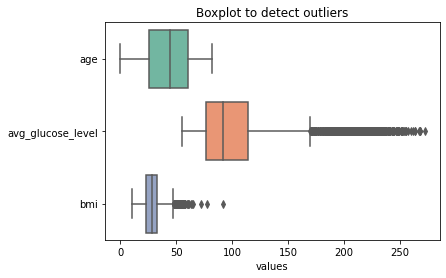

In [257]:
box_plot = stroke_df_preprocess[['age' , 'avg_glucose_level' ,  'bmi']]
axs = sns.boxplot(data = box_plot, orient='h', palette='Set2')
axs.set_xlabel('values')
axs.set_title('Boxplot to detect outliers')

As we can see from the above boxplot that only the vaiables "avg_glucose_level" and "bmi" have outliers. The outliers in both the features will be removed using the IQR method.

In [258]:
Q1 = stroke_df_preprocess.quantile(0.25)
Q3 = stroke_df_preprocess.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                  35.000
avg_glucose_level    37.045
bmi                   9.625
dtype: float64


In [259]:
# the outliers will be removed
stroke_df_out = stroke_df_preprocess[~( (stroke_df_preprocess < (Q1 - 1.5 * IQR)) |
                                       (stroke_df_preprocess > (Q3 + 1.5 * IQR))).any(axis =1)]


In [260]:
# the number of records or observations are decreased as the outliers were dropped
stroke_df_out.shape

(3337, 11)

In [261]:
stroke_df_out.describe()

,age,avg_glucose_level,bmi
count,3337.000000,3337.000000,3337.000000
mean,40.983362,91.474486,27.833144
std,22.722731,22.776762,6.841183
min,0.080000,55.120000,10.300000
25%,24.000000,74.900000,23.000000
50%,42.000000,88.190000,27.500000
75%,58.000000,104.030000,32.200000
max,82.000000,169.430000,47.600000


### 4) Data Exploration and Visualisation : <a class="anchor" id="s4"></a>

### 4.1) One variable plots: <a class="anchor" id="s4.1"></a>

#### 4.1.1)  Visualisation of target variable - stroke : <a class="anchor" id="s4.1.1"></a>

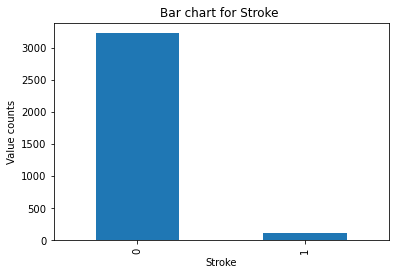

In [262]:
stroke_df_out['stroke'].value_counts().plot(kind = 'bar')
plt.title('Bar chart for Stroke ')
plt.xlabel('Stroke')
plt.ylabel('Value counts')
plt.show()

                            Fig 1.1

Ananlysis : As we can see from the above figure that, the dataset consists of 3223 patients who did not have a stroke, and 114 patients who had a stroke. Clearly the data is imbalanced.

#### 4.1.2) Visualisation of variable age : <a class="anchor" id="s4.1.2"></a>

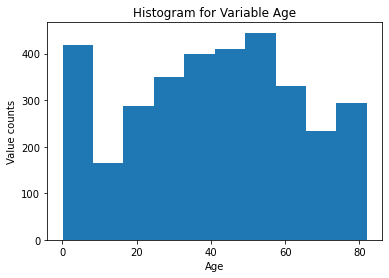

In [263]:
plt.hist(stroke_df_out['age'], bins = 10)
plt.title('Histogram for Variable Age')
plt.xlabel('Age')
plt.ylabel('Value counts')
plt.show()

                            Fig 1.2

Analysis : From the above histogram plot of age variable we could notice that it is uniformly distributed. The age ranges from 0.8 days (new born babies) to age 82 years. 

### 4.2) Two variable plots: <a class="anchor" id="s4.2"></a>

#### 4.2.1) Visualisation of BMI and Average glucose level :  <a class="anchor" id="s4.2.1"></a>

Check if there exists any correlation between BMI and Average glucose level which can help us in further analysis.

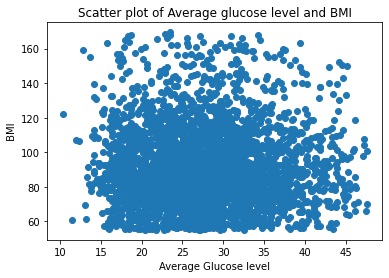

In [264]:
plt.scatter(stroke_df_out['bmi'], stroke_df_out['avg_glucose_level'])
plt.xlabel('Average Glucose level')
plt.ylabel(' BMI ')
plt.title('Scatter plot of Average glucose level and BMI')
plt.show()

                            Fig 1.3

Analysis : From the scatter plot we can notice that there is no correlation between BMI and Average glucose level. 

#### 4.2.2) Visualisation of BMI and Stroke :  <a class="anchor" id="s4.2.2"></a>

Hypothesis : According to medical reports, individuals who have a bmi of 25 - 29 are overweight and 30 and above are obese.
People with higher BMI value are more prone to stroke than the people with lower BMI value, because of excess fat in the body inflammation is likely to occur which causes poor blood flow and increase in blockages leading to stroke.

Text(0.5, 0.98, 'Box plot of BMI grouped by Stroke')

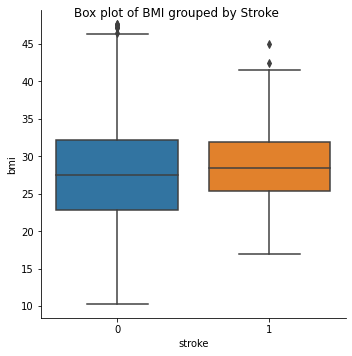

In [265]:
ax = sns.catplot(x ='stroke', y = 'bmi', kind = 'box', data = stroke_df_out)
ax.fig.suptitle('Box plot of BMI grouped by Stroke') 

                      Fig 1.4

Analysis : In the above figure x-axis depicts the stroke and y -axis the bmi values. We could clearly see that the boxplot for stroke =1(patients with stroke), the IQR lies between approximately 26 to 32 which is considered overweight or obese. So these individuals are more prone to stroke.   

### 4.3) Three variable plot: <a class="anchor" id="s4.3"></a>

#### 4.3.1) Visualisation for BMI, stroke and hypertension variables:  <a class="anchor" id="s4.3.1"></a>

 Hypothesis : Individuals with hypertension are more prone to stroke, because the high blood pressure can cause the arteries that supply blood and oxygen to the brain, to be blocked leading to stroke.

Text(0.5, 0.98, 'Box plot of BMI for stroke and grouped by Hypertension')

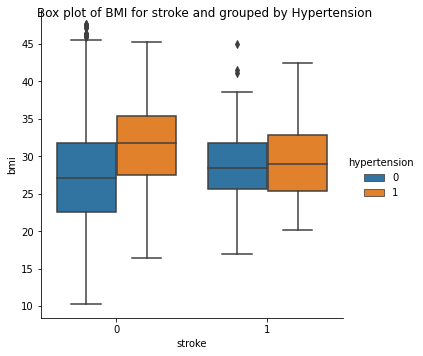

In [266]:
ax = sns.catplot(x ='stroke', y = 'bmi', kind = 'box', hue = 'hypertension', data = stroke_df_out)
ax.fig.suptitle('Box plot of BMI for stroke and grouped by Hypertension') 

Analysis : From the analysis of 2.2 visualisation we know that individuals with higher BMI are more prone to stroke. In this visualisation we could see that the boxplot for stroke =1 and hypertension = 1 (Patients who have hypertension) has a higher IQR compared to the boxplot of hypertension = 0. This clearly corresponds to the above hypothese that people with hypertension and higher BMI are more prone to stroke. 

#### 4.3.2) Visualisation for Age, stroke and gender variables: <a class="anchor" id="s4.3.2"></a>

Hypothesis : According to medical reports stroke occurs in all ages but it doubles the risk of stroke for age between 55 and 85. Female individuals are more prone to stroke.

Text(0.5, 0.98, 'Box plot of Age for stroke and grouped by Gender')

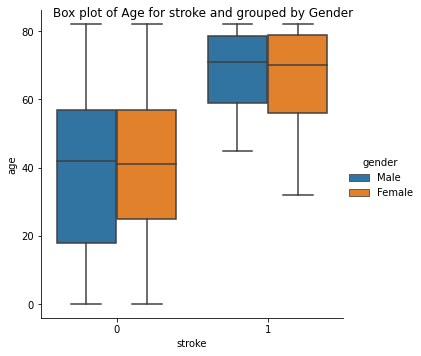

In [267]:
ax = sns.catplot(x ='stroke', y = 'age', kind = 'box', hue = 'gender', data = stroke_df_out)
ax.fig.suptitle('Box plot of Age for stroke and grouped by Gender') 

Analysis : From the above visualisation we could see that the boxplots clearly depict that the IQR for stroke = 1 ranges from age value 55 to 82. So it is clearly visible old people are more prone to stoke and especially female indviduals as their IQR in the boxplot is more than the IQR for male individuals when stroke = 1. This clearly corresponds to the above stated hypothesis. 

### 5) Summary and Conclusions: <a class="anchor" id="s5"></a>

The main aim of this project is to predict wether an individual will have a stroke based on the input parameters. After the exploration and visualisation of the variables in the dataset we could see that, mainly the features age, hypertension , bmi and avg_glucose_level contribute more to this model. The insights gained from these variables, include indviduals with age between 55 and 85 , hypertension = 1, bmi greater than 25 and gender = female are more prone to stroke. All those above visualisations were proved with hypothesis. 

### 6) References : <a class="anchor" id="s6"></a>

[1] High blood pressure. (2015). Retrieved 11 April 2021, from https://www.stroke.org.uk/what-is-stroke/are-you-at-risk-of-stroke/high-blood-pressure#:~:text=High%20blood%20pressur

[2] seaborn.boxplot — seaborn 0.11.1 documentation
seaborn.boxplot — seaborn 0.11.1 documentation. (2021). Retrieved 11 April 2021, from https://www.stroke.org.uk/what-is-stroke/are-you-at-risk-of-stroke/high-blood-pressure#:~:text=High%20blood%20pressure%20puts%20an,become%20stiffer%20and%20more%20narrow.

[3] Kurth, T., Gaziano, J., Berger, K., Kase, C., Rexrode, K., & Cook, N. et al. (2002). Body Mass Index and the Risk of Stroke in Men. Archives Of Internal Medicine, 162(22), 2557. doi: 10.1001/archinte.162.22.2557